# <font color=Red> Project Description

Great! For our next project, we will focus on **customer segmentation**.  
In this project, we aim to group customers into distinct segments based on their behaviors and characteristics using unsupervised machine learning techniques such as clustering.


<img src='https://3.bp.blogspot.com/-2m9IKnbDNF0/WApY6FB2MTI/AAAAAAAAFfw/-hs0JqhxNO8RYjLBFwevYrDm6oAj_9JNgCLcB/s1600/alisveris-nasil.jpg' width=500>

# <font color=Red> IMPORT PACKETS

In [4]:
import pandas as pd
import sqlite3
from sklearn.cluster import KMeans
import datetime as dt
pd.set_option("display.max_columns",6000)
pd.set_option("display.max_rows",300)

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("PBL5recommendationdata.csv", encoding="latin-1")

In [6]:
df.sample()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4124,3664,JEANNETTE,MOZINA,NaN,1463057823,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1463057823,0.0,17201,3664,JEANNETTE,MOZINA,NaN,17201,NaN,NaN,NaN,USD,NaN,37.99,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.99,NaN,NaN,NaN,NaN,NaN,NaN,9.4055E+21,3.0,1.463058e+09,NaN,authorize.net,NaN,37.99,NaN,8400076876,85708,NaN,1,1463057825,1.463069e+09,1.463069e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,19943,17201,17051.0,Bottom 

In [7]:
df.shape

(4194, 181)

In [8]:
df.isnull().sum()

Customers.id                         0
Customers.fname                      0
Customers.lname                      0
Customers.company                 3467
Customers.create_date                0
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.last_modified              0
Customers.customer_type            423
Orders.id                            0
Orders.customer_id                   0
Orders.fname                         0
Orders.lname                         0
Orders.company                    3466
Orders.order_number                  0
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.currency                      0
Orders.sales_rep         

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [23]:
# Boş değer sayısını kontrol et
empty_counts = df.isnull().sum()

# 2500 veya daha fazla boş değeri olan sütunları belirle
columns_to_drop = empty_counts[empty_counts >= 2500].index

# Bu sütunları DataFrame'den kaldır
df = df.drop(columns=columns_to_drop)

In [25]:
df.isnull().sum()

Customers.id                        0
Customers.fname                     0
Customers.lname                     0
Customers.create_date               0
Customers.mailing                2080
Customers.last_modified             0
Customers.customer_type           423
Orders.id                           0
Orders.customer_id                  0
Orders.fname                        0
Orders.lname                        0
Orders.order_number                 0
Orders.currency                     0
Orders.subtotal                     0
Orders.tax                        457
Orders.shipping                   195
Orders.total                        0
Orders.shipping_carrier           617
Orders.shipping_method            443
Orders.tracking                   376
Orders.payment_status               5
Orders.payment_date                18
Orders.payment_type               384
Orders.payment_amount              18
Orders.payment_id                 430
Orders.payment_code               748
Orders.statu

In [27]:
# Print the data types of each column
print(df.dtypes)

# Alternatively, select only the object columns
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Customers.id                       int64
Customers.fname                   object
Customers.lname                   object
Customers.create_date              int64
Customers.mailing                float64
Customers.last_modified            int64
Customers.customer_type          float64
Orders.id                          int64
Orders.customer_id                 int64
Orders.fname                      object
Orders.lname                      object
Orders.order_number               object
Orders.currency                   object
Orders.subtotal                  float64
Orders.tax                       float64
Orders.shipping                  float64
Orders.total                     float64
Orders.shipping_carrier           object
Orders.shipping_method            object
Orders.tracking                   object
Orders.payment_status            float64
Orders.payment_date              float64
Orders.payment_type               object
Orders.payment_amount            float64
Orders.payment_i

- The `customers` DataFrame contains selected columns related to customer information:
  - `'Customers.create_date'`: the date the customer account was created,
  - `'Customers.last_modified'`: the date the customer information was last updated,
  - `'Customers.customer_type'`: type or category of the customer,
  - `'Customers.id'`: unique identifier for each customer.

- The `orders` DataFrame contains selected columns related to orders:
  - `'Orders.subtotal'`: the subtotal amount of the order before discounts and taxes,
  - `'Orders.total'`: the final total amount after adjustments,
  - `'Orders.payment_status'`: the payment status for the order (e.g., paid, pending),
  - `'Orders.payment_amount'`: the actual payment amount,
  - `'Orders.status'`: current order status (e.g., shipped, delivered),
  - `'Orders.payment_date'`: the date the payment was made.

- The `products` DataFrame contains selected columns related to product information:
  - `'Products.list_price'`: the listed price of the product,
  - `'Products.price'`: the actual selling price,
  - `'Products.cost'`: the cost incurred to provide the product,
  - `'Products.status'`: current status of the product (e.g., available, discontinued).

These DataFrames are prepared to analyze customer, order, and product information separately for the customer segmentation project.


In [29]:
customers=df[['Customers.create_date','Customers.last_modified','Customers.customer_type','Customers.id']]
orders=df[['Orders.subtotal','Orders.total','Orders.payment_status','Orders.payment_amount','Orders.status','Orders.payment_date']]
products=df[['Products.list_price','Products.price','Products.cost','Products.status']]

In [31]:
customers.head()

,Customers.create_date,Customers.last_modified,Customers.customer_type,Customers.id
0,1426018724,1437764306,0.0,797
1,1386089139,1437764354,0.0,3
2,1386089139,1437764354,0.0,3
3,1386780263,1437762646,0.0,4
4,1386861599,1437764316,0.0,5


- Unnecessary columns were removed from the dataset to focus only on the relevant customer information.

## Data Dictionary

| Column Name                | Description                                                       | Example Value      |
|----------------------------|-------------------------------------------------------------------|--------------------|
| **Customers.create_date**  | The date (in Unix timestamp format) when the customer account was created.   | 1426018724         |
| **Customers.last_modified**| The date (in Unix timestamp format) when the customer record was last updated.| 1437764306         |
| **Customers.customer_type**| The type or segment code assigned to the customer (e.g., 0.0 for regular).   | 0.0                |
| **Customers.id**           | The unique identifier assigned to each customer.                          | 797                |


In [33]:
customers.isnull().sum()

Customers.create_date        0
Customers.last_modified      0
Customers.customer_type    423
Customers.id                 0
dtype: int64

In [37]:
customers['Customers.customer_type']=customers['Customers.customer_type'].fillna(customers['Customers.customer_type'].mode()[0])

In [41]:
customers.isnull().sum()

Customers.create_date      0
Customers.last_modified    0
Customers.customer_type    0
Customers.id               0
dtype: int64

In [43]:
orders.isnull().sum()

Orders.subtotal           0
Orders.total              0
Orders.payment_status     5
Orders.payment_amount    18
Orders.status             0
Orders.payment_date      18
dtype: int64

- All missing values in the selected DataFrames were filled with the most frequent value (mode) for each column.
- Using the mode ensures that the most common and representative value for each feature is used to replace missing data.
- This approach helps maintain data consistency and reduces the potential bias that might result from randomly filling or dropping missing entries.

In [47]:
orders['Orders.payment_status']=orders['Orders.payment_status'].fillna(orders['Orders.payment_status'].mode()[0])

In [53]:
orders['Orders.payment_amount']=orders['Orders.payment_amount'].fillna(orders['Orders.payment_amount'].mode()[0])

In [59]:
orders['Orders.payment_amount']=orders['Orders.payment_amount'].fillna(orders['Orders.payment_amount'].mode()[0])

In [61]:
orders['Orders.payment_date']=orders['Orders.payment_date'].fillna(orders['Orders.payment_date']).mode()[0]

In [63]:
orders.isnull().sum()

Orders.subtotal          0
Orders.total             0
Orders.payment_status    0
Orders.payment_amount    0
Orders.status            0
Orders.payment_date      0
dtype: int64

In [65]:
products.isnull().sum()

Products.list_price    177
Products.price         158
Products.cost          157
Products.status        157
dtype: int64

In [69]:
products['Products.list_price']=products['Products.list_price'].fillna(products['Products.list_price'].mode()[0])

In [73]:
products['Products.price']=products['Products.price'].fillna(products['Products.list_price'].mode()[0])

In [75]:
products['Products.cost']=products['Products.cost'].fillna(products['Products.cost'].mode()[0])

In [77]:
products['Products.status']=products['Products.status'].fillna(products['Products.status'].mode()[0])

In [79]:
products.isnull().sum()

Products.list_price    0
Products.price         0
Products.cost          0
Products.status        0
dtype: int64

In [81]:
products.head()

,Products.list_price,Products.price,Products.cost,Products.status
0,80.70,57.64,44.00,0.0
1,14.41,10.29,1.87,1.0
2,96.29,68.78,52.50,0.0
3,27.38,19.56,12.62,0.0
4,50.47,36.05,25.75,1.0


In [87]:
conn = sqlite3.connect('customer_data.db')

In [89]:
# DataFrame'leri SQLite veritabanına kaydetme
customers.to_sql('Customer', conn, if_exists='replace', index=False)
products.to_sql('Products', conn, if_exists='replace', index=False)
orders.to_sql('Orders', conn, if_exists='replace', index=False)

# Veritabanındaki tabloları okuma
customer_df = pd.read_sql_query("SELECT * FROM Customer", conn)
products_df = pd.read_sql_query("SELECT * FROM Products", conn)
orders_df = pd.read_sql_query("SELECT * FROM Orders", conn)

# DataFrame'leri birleştirme
concatenated_df = pd.concat([orders_df, customer_df, products_df], axis=1)

- The DataFrames (`customers`, `products`, `orders`) are saved as separate tables in an SQLite database using the `.to_sql()` function.
    - The `if_exists='replace'` parameter ensures that any existing table with the same name is replaced.
    - The `index=False` parameter prevents the DataFrame index from being added as a column in the table.

- The tables are then read back from the SQLite database into new DataFrames (`customer_df`, `products_df`, `orders_df`) using SQL queries.

- Finally, these DataFrames are concatenated side by side (column-wise) using `pd.concat()`, resulting in a single DataFrame (`concatenated_df`) that combines the information from customers, orders, and products for further analysis.

In [91]:
concatenated_df 

,Orders.subtotal,Orders.total,Orders.payment_status,Orders.payment_amount,Orders.status,Orders.payment_date,Customers.create_date,Customers.last_modified,Customers.customer_type,Customers.id,Products.list_price,Products.price,Products.cost,Products.status
0,57.20,64.29,3.0,64.29,1,1.461860e+09,1426018724,1437764306,0.0,797,80.70,57.64,44.00,0.0
1,20.00,29.99,3.0,29.99,1,1.461860e+09,1386089139,1437764354,0.0,3,14.41,10.29,1.87,1.0
2,68.78,78.73,3.0,78.73,3,1.461860e+09,1386089139,1437764354,0.0,3,96.29,68.78,52.50,0.0
3,19.56,29.55,3.0,29.55,1,1.461860e+09,1386780263,1437762646,0.0,4,27.38,19.56,12.62,0.0
4,36.05,46.00,3.0,46.00,1,1.461860e+09,1386861599,1437764316,0.0,5,50.47,36.05,25.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,14.85,16.06,3.0,16.06,0,1.461860e+09,1463408698,1463408698,0.0,3730,33.11,23.65,15.50,3.0
4190,39.99,39.99,1.0,39.99,0,1.461860e+09,1463412756,1463412756,0.0,3732,55.19,69.99,28.16,3.0
4191,1099.00,989.10,1.0,989.10,5,1.461860e+09,1463413245,1463413245,0.0,3733,2107.50,1099.00,675.00,3.0
4192,129.99,129.99,3.0,129.99,0,1.461860e+09,1463416687,1463416687,0.0,3735,175.81,129.99,91.00,3.0


concatenated_df.isnull().sum()

### Bu adimda KMeans kullanarak Musterileri segmentlere ayirma islemi yapacagiz

In [97]:
import pandas as pd
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
import seaborn as sns

import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer

import datetime as dt

- A new DataFrame `x` is created by selecting only the relevant columns from the concatenated DataFrame.
- The selected columns include key information about customers, their orders, and the products involved in those orders.
- This streamlined DataFrame will be used as the main feature set for customer segmentation analysis.


In [105]:
x=concatenated_df[['Customers.id','Customers.create_date','Customers.last_modified','Customers.customer_type',
      'Orders.subtotal','Orders.total','Orders.payment_status','Orders.payment_amount',
    'Orders.status','Orders.payment_date','Products.list_price','Products.price','Products.cost','Products.status']]

In [107]:
x.head()

,Customers.id,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.subtotal,Orders.total,Orders.payment_status,Orders.payment_amount,Orders.status,Orders.payment_date,Products.list_price,Products.price,Products.cost,Products.status
0,797,1426018724,1437764306,0.0,57.20,64.29,3.0,64.29,1,1.461860e+09,80.70,57.64,44.00,0.0
1,3,1386089139,1437764354,0.0,20.00,29.99,3.0,29.99,1,1.461860e+09,14.41,10.29,1.87,1.0
2,3,1386089139,1437764354,0.0,68.78,78.73,3.0,78.73,3,1.461860e+09,96.29,68.78,52.50,0.0
3,4,1386780263,1437762646,0.0,19.56,29.55,3.0,29.55,1,1.461860e+09,27.38,19.56,12.62,0.0
4,5,1386861599,1437764316,0.0,36.05,46.00,3.0,46.00,1,1.461860e+09,50.47,36.05,25.75,1.0


In [109]:
model=KMeans(4)

In [111]:
model=model.fit(x)

In [113]:
tahmin=model.predict(x)

In [115]:
x['cluster']=tahmin

In [117]:
x.head()

,Customers.id,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.subtotal,Orders.total,Orders.payment_status,Orders.payment_amount,Orders.status,Orders.payment_date,Products.list_price,Products.price,Products.cost,Products.status,cluster
0,797,1426018724,1437764306,0.0,57.20,64.29,3.0,64.29,1,1.461860e+09,80.70,57.64,44.00,0.0,1
1,3,1386089139,1437764354,0.0,20.00,29.99,3.0,29.99,1,1.461860e+09,14.41,10.29,1.87,1.0,2
2,3,1386089139,1437764354,0.0,68.78,78.73,3.0,78.73,3,1.461860e+09,96.29,68.78,52.50,0.0,2
3,4,1386780263,1437762646,0.0,19.56,29.55,3.0,29.55,1,1.461860e+09,27.38,19.56,12.62,0.0,2
4,5,1386861599,1437764316,0.0,36.05,46.00,3.0,46.00,1,1.461860e+09,50.47,36.05,25.75,1.0,2


In [119]:
silhouette_score(x,tahmin)

0.5871013099337612

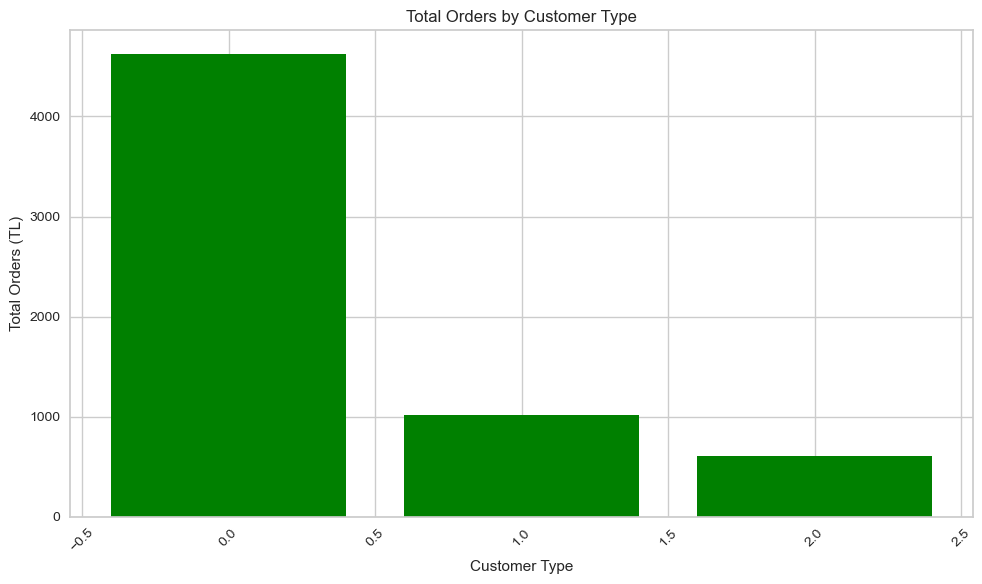

In [129]:
import matplotlib.pyplot as plt

# Create a figure with specified size
plt.figure(figsize=(10, 6))

# Create a bar chart
plt.bar(x['Customers.customer_type'], x['Orders.total'], color='green')

# Set the title of the chart
plt.title('Total Orders by Customer Type')

# Label the x-axis
plt.xlabel('Customer Type')

# Label the y-axis
plt.ylabel('Total Orders (TL)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout to fit everything nicely
plt.tight_layout()

# Display the plot
plt.show()

- An empty list `wcss` is created to store the within-cluster sum of squares (WCSS) values for each clustering solution.
- An empty list `ss` is created to store the silhouette scores for each clustering solution.
- A loop runs from 2 to 9 (inclusive), testing different numbers of clusters (`i`) for the KMeans algorithm.
    - For each value of `i`, a KMeans clustering model with `i` clusters is created and fitted to the feature set `x`.
    - The cluster predictions (`tahmin`) for all samples are computed.
    - The silhouette score (`ss1`) for the current clustering result is calculated and added to the `ss` list. This score measures how well-separated the clusters are (higher is better).
    - The WCSS value (model inertia) is calculated and appended to the `wcss` list. This value measures the compactness of the clusters (lower is better).
    - Each silhouette score is printed for reference.
- This approach helps determine the optimal number of clusters by comparing WCSS and silhouette scores across different cluster counts.

In [131]:
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)
    

0.720186346349738
0.6816931752176215
0.5872272109304872
0.5879340856126936
0.6050536173436359
0.5992624036084396
0.5892804302778148
0.587428497383674


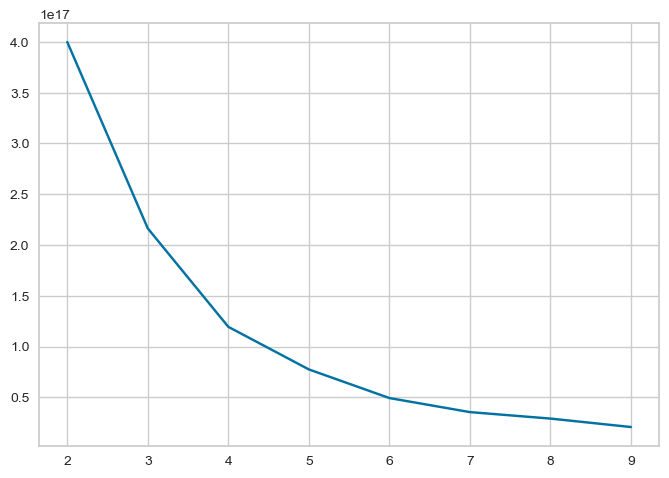

In [133]:
plt.plot(range(2,10),wcss);

<Axes: >

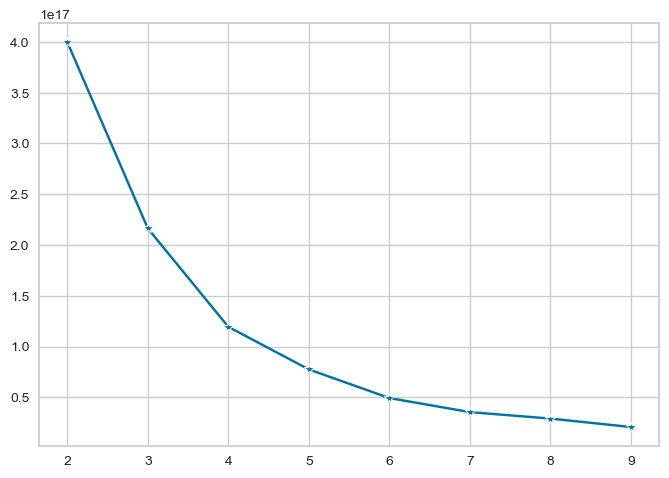

In [135]:
sns.lineplot(x=range(2,10),y=wcss,marker='*')

In [137]:
from yellowbrick.cluster import KElbowVisualizer

- A KMeans clustering model (`km`) is initialized.
- The `KElbowVisualizer` from the Yellowbrick library is used to help determine the optimal number of clusters for the data.
- The `k=(2,10)` parameter sets the range of cluster numbers to test (from 2 to 10).
- The visualizer fits the KMeans model to the data `x` for each cluster count in the specified range.
- The elbow plot is displayed, showing the within-cluster sum of squares (WCSS) for each number of clusters.
- The "elbow point" in the plot suggests the most appropriate number of clusters to use for segmentation.

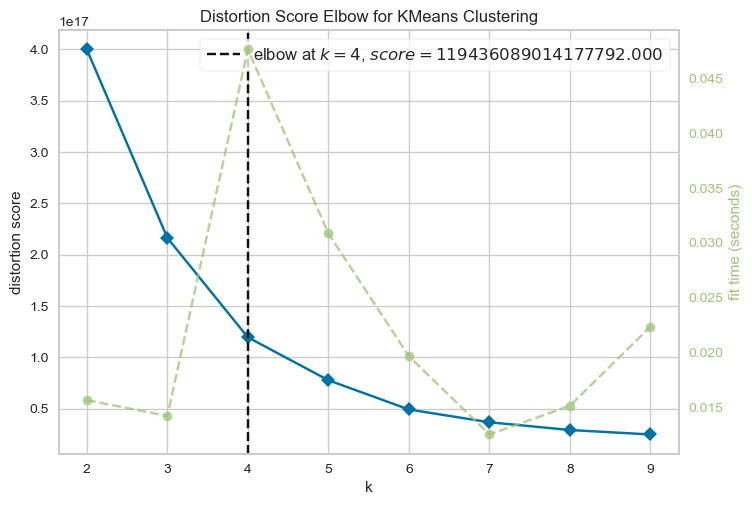

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [139]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show()

In [141]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [143]:
data=linkage(x, method='ward', metric='euclidean')

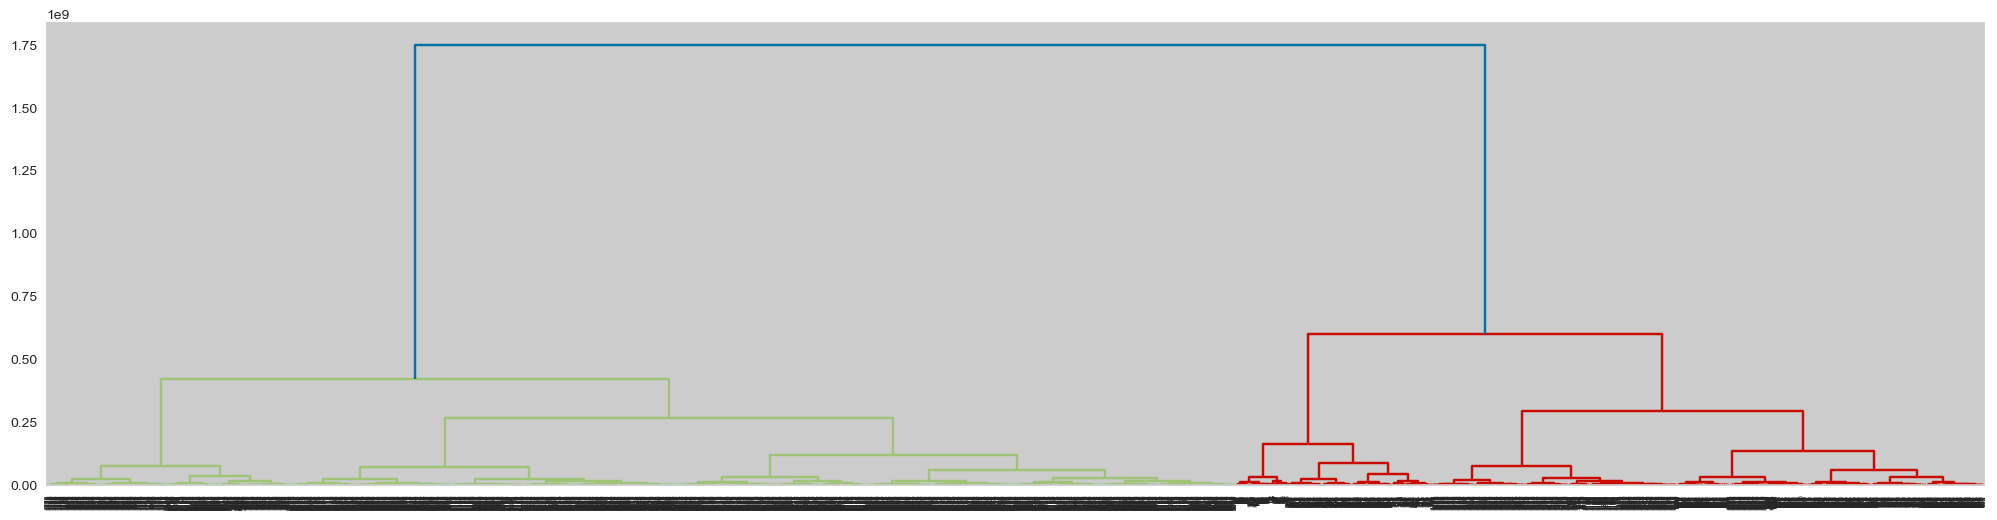

In [145]:
plt.figure(figsize=(25,6))
dendrogram(data);

In [147]:
x['Orders.payment_date']=pd.to_datetime(x['Orders.payment_date'],unit='s')

In [149]:
x.head()

,Customers.id,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.subtotal,Orders.total,Orders.payment_status,Orders.payment_amount,Orders.status,Orders.payment_date,Products.list_price,Products.price,Products.cost,Products.status,cluster
0,797,1426018724,1437764306,0.0,57.20,64.29,3.0,64.29,1,2016-04-28 16:14:49,80.70,57.64,44.00,0.0,1
1,3,1386089139,1437764354,0.0,20.00,29.99,3.0,29.99,1,2016-04-28 16:14:49,14.41,10.29,1.87,1.0,2
2,3,1386089139,1437764354,0.0,68.78,78.73,3.0,78.73,3,2016-04-28 16:14:49,96.29,68.78,52.50,0.0,2
3,4,1386780263,1437762646,0.0,19.56,29.55,3.0,29.55,1,2016-04-28 16:14:49,27.38,19.56,12.62,0.0,2
4,5,1386861599,1437764316,0.0,36.05,46.00,3.0,46.00,1,2016-04-28 16:14:49,50.47,36.05,25.75,1.0,2


In [153]:
from datetime import datetime

# Analiz tarihini belirleme
now = datetime(2023, 8, 28)  # Örnek analiz tarihi

# RFM metriklerini hesaplama
rfm = x.groupby('Customers.id').agg({
    'Orders.payment_date': lambda date: (now - date.max()).days,  
    'Orders.payment_date': 'count',                              
    'Orders.payment_amount': 'sum'                               
}).rename(columns={
    'Orders.payment_date': 'Recency',
    'Orders.payment_date': 'Frequency',
    'Orders.payment_amount': 'Monetary'
}).reset_index()

# RFM tablosunu kontrol edin
print(rfm.head())

   Customers.id  Frequency  Monetary
0             3          2    108.72
1             4          1     29.55
2             5          3    200.57
3             7          1     49.14
4             8          1     69.70


- The `datetime` module is imported, and an example analysis date (`now`) is set.
- The RFM (Recency, Frequency, Monetary) metrics are calculated for each customer by grouping the data with respect to `'Customers.id'`.
    - **Recency**: Calculated as the number of days since the customer's most recent payment. This is done by taking the difference between the analysis date and the most recent `'Orders.payment_date'` for each customer.
    - **Frequency**: The total number of payments made by each customer (i.e., the count of `'Orders.payment_date'`).
    - **Monetary**: The total sum of payments made by each customer (i.e., the sum of `'Orders.payment_amount'`).
- The resulting RFM table is created, and the column names are set accordingly.
- The first few rows of the RFM table are printed to check the results.

In [161]:
x['Orders.payment_date'].value_counts()

Orders.payment_date
2016-04-28 16:14:49    4194
Name: count, dtype: int64

In [166]:
rfm.columns

Index(['Customers.id', 'Frequency', 'Monetary'], dtype='object')

In [172]:
# Analysis date
now = datetime(2023, 8, 28)



- The RFM (Recency, Frequency, Monetary) metrics are calculated for each customer using the `groupby` and `agg` functions:
    - **Recency**: For each customer, the number of days since their most recent order payment is calculated by subtracting the latest `'Orders.payment_date'` from the analysis date (`now`).
    - **Frequency**: The total number of order payments made by each customer is counted.
    - **Monetary**: The total payment amount spent by each customer is summed.
- The resulting RFM table summarizes each customer's recent activity, transaction frequency, and total spending.
- The `.reset_index()` function ensures that the customer IDs remain as a column in the resulting DataFrame.

In [174]:


# Calculate RFM
rfm = x.groupby('Customers.id').agg(
    Recency=('Orders.payment_date', lambda date: (now - date.max()).days),
    Frequency=('Orders.payment_date', 'count'),
    Monetary=('Orders.payment_amount', 'sum')
).reset_index()



In [176]:


# Print the RFM DataFrame to check column names
print(rfm)



      Customers.id  Recency  Frequency  Monetary
0                3     2677          2    108.72
1                4     2677          1     29.55
2                5     2677          3    200.57
3                7     2677          1     49.14
4                8     2677          1     69.70
...            ...      ...        ...       ...
3049          3730     2677          1     16.06
3050          3732     2677          1     39.99
3051          3733     2677          1    989.10
3052          3735     2677          1    129.99
3053          3736     2677          1     24.54

[3054 rows x 4 columns]


In [178]:
#RFM DataFrame to check column names
print(rfm)


      Customers.id  Recency  Frequency  Monetary
0                3     2677          2    108.72
1                4     2677          1     29.55
2                5     2677          3    200.57
3                7     2677          1     49.14
4                8     2677          1     69.70
...            ...      ...        ...       ...
3049          3730     2677          1     16.06
3050          3732     2677          1     39.99
3051          3733     2677          1    989.10
3052          3735     2677          1    129.99
3053          3736     2677          1     24.54

[3054 rows x 4 columns]


In [190]:
from sklearn.preprocessing import StandardScaler
# Scale RFM metrics
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [192]:
from sklearn.preprocessing import StandardScaler

# Scale RFM metrics
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [194]:
# Output the scaled values
rfm_scaled

array([[ 0.        ,  0.36848297, -0.12624527],
       [ 0.        , -0.21947261, -0.25702031],
       [ 0.        ,  0.95643855,  0.02547493],
       ...,
       [ 0.        , -0.21947261,  1.32798913],
       [ 0.        , -0.21947261, -0.09111093],
       [ 0.        , -0.21947261, -0.26529596]])

In [198]:
from sklearn.preprocessing import StandardScaler

# Recency, Frequency ve Monetary sütunlarını ölçekleme
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Frequency','Monetary','Recency']])

- The elbow method is used to determine the optimal number of clusters for the RFM data.
- The `inertia` list will store the within-cluster sum of squares (WCSS) for each value of k.
- `k_values` defines the range of cluster numbers to try (from 1 up to a maximum of 10 or the number of samples).
- For each k in `k_values`, a KMeans model is fitted to the scaled RFM data (`rfm_scaled`), and the inertia (WCSS) is appended to the list.
- A line plot (elbow plot) is created to visualize inertia versus the number of clusters.
- The "elbow point" in the plot suggests the most appropriate number of clusters for customer segmentation.

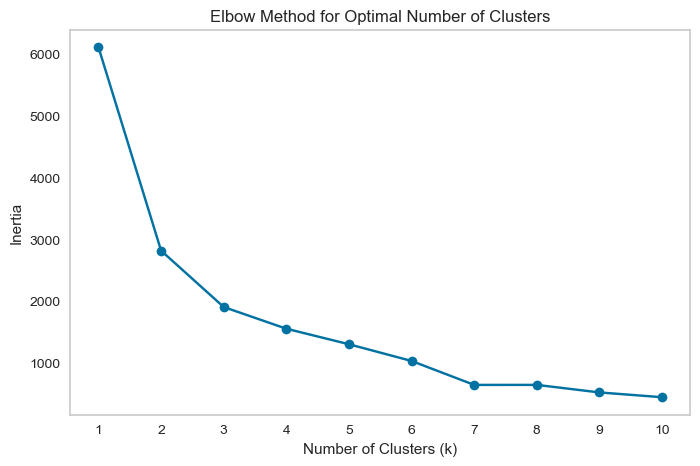

In [200]:
# Elbow Method
inertia = []
k_values = range(1, min(11, len(rfm_scaled) + 1))  # Ensure k does not exceed number of samples

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_values)  # Set x-ticks to the actual k values
plt.grid()
plt.show()

In [202]:
# KMeans modelini uygulama (örnek: 4 küme)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Segment'] = kmeans.fit_predict(rfm_scaled)

# Segmentlerin ortalama özelliklerini inceleme
segment_analysis = rfm.groupby('Segment').mean()
print(segment_analysis)

         Customers.id  Recency  Frequency     Monetary
Segment                                               
0         1726.189189   2677.0   3.437838   654.943405
1         1436.000000   2677.0  20.100000  7999.984000
2         1920.289706   2677.0   1.094446    96.233636
3         1247.968750   2677.0   8.218750  2882.007812


## Project Summary: Customer Segmentation Using RFM and Clustering

In this project, we performed customer segmentation based on transactional data by applying RFM (Recency, Frequency, Monetary) analysis and clustering techniques. The goal was to identify distinct customer groups to help the business develop targeted marketing strategies and improve customer relationship management.

### Main Steps and Methods:

- **Data Preparation:**  
  Relevant columns from customer, order, and product tables were selected and unnecessary fields were removed. Missing values were filled using the mode (most frequent value) to maintain data consistency.

- **Database Integration:**  
  DataFrames were saved into an SQLite database and then reloaded for efficient storage and retrieval. The data from customers, orders, and products were merged into a single table for comprehensive analysis.

- **Feature Engineering:**  
  The merged DataFrame was filtered to keep only features relevant to segmentation analysis, such as customer information, order amounts, payment status, and product details.

- **RFM Calculation:**  
  For each customer:
    - **Recency:** Number of days since the most recent order payment.
    - **Frequency:** Total number of order payments.
    - **Monetary:** Total amount spent.
  These metrics were computed using groupby and aggregation functions, resulting in an RFM table summarizing each customer's recent activity and value.

- **Data Scaling:**  
  The RFM features were scaled to ensure fair clustering and to avoid dominance of variables with larger numerical ranges.

- **Optimal Cluster Determination:**  
  The Elbow Method and silhouette scores were used to determine the ideal number of clusters for segmenting customers. KMeans clustering was applied to the scaled RFM data.

- **Customer Segmentation:**  
  Based on clustering results, customers were grouped into distinct segments (e.g., loyal, new, high-value, or at-risk customers). This allows the business to better understand customer behavior patterns and tailor their marketing efforts.

### Results and Benefits:

- The segmentation approach enables more effective targeting of different customer groups with personalized marketing campaigns and retention strategies.
- The business can identify valuable customers, those at risk of churn, and growth opportunities within their customer base.
- The methodology can be adapted and scaled for other customer analytics and CRM applications.

**Conclusion:**  
By combining RFM analysis with clustering techniques, the project provided actionable insights into customer behavior and delivered a data-driven foundation for improved decision-making in marketing and customer relationship management.
